<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "200">

<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/PMF%20002.png?raw=true" width = "700">

---
# **Visualização de Dados e Storytelling**
---

## **1. Bibliotecas**

***Todas as bibliotecas usadas no módulo 09 estão aqui. Caso queira instalar as mesmas versões e estiver em uma IDE, siga os passos abaixo:***

Os comandos abaixo podem ser rodados em uma nova célula deste jupyter notebook.
- Baixe e instale a versão do Python 3.11.9
- Crie um ambiente virtual (não é obrigatório, mas é uma boa prática):
  ```!python -m venv .venv```
- Ative o ambiente virtual:
    - No Windows: ```!.venv\Scripts\activate```
    - No Linux/Mac: ```!source .venv/bin/activate```
- Instale as bibliotecas com o arquivo requirements.txt:
  ```!pip install -r requirements.txt```

In [49]:
import pandas as pd
import numpy as np
import wbdata
import requests
from datetime import datetime
import os
import yfinance as yf
import statsmodels.api as sm
from binance.client import Client
import json
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import quantstats as qs
import mplfinance as mpf
import ta

## **2. Introdução**

### **2.1. O que é Storytelling?**

![](imagens/definicao.png)

### **2.2. Qual a Importância do Storytelling?**

![importancia](imagens/importancia.png)

#### **2.2.1. Quais são as Etapas na Construção de um Bom Storytelling?**

![etapas](imagens/etapas.png)

### **2.3. Exemplos**

![exemplo01](imagens/exemplo01.png)

![exemplo02](imagens/exemplo02.png)

### **2.4. Ferramentas**

#### **2.4.1. Principais do Mercado**

![ferramentas01](imagens/ferramentas01.png)

#### **2.4.1. Principais do Python**

![ferramentas02](imagens/ferramentas02.png)

## **3. Projeto de Conclusão do Curso**

### **3.1. Objetivo**

![projeto01](imagens/projeto01.png)

### **3.2. Passo a Passo**

![projeto02](imagens/projeto02.png)

### **3.3. Entregáveis**

![projeto03](imagens/projeto03.png)

## **4. Framework do Projeto**

Iremos abordar nessa seção os passos para incluir os dados dentro do Power BI, esse modelo poderá ser seguido para entrega do trabalho, entretanto não fiquem presos a essa estrutura. Para isso nós vamos definir alguns objetivos:

- Carregar e plotar no PBI os dados macroeconômicos da Quandl;
- Carregar e plotar os dados de preços e retornos da carteira;
- Carregar e plotar indicadores de risco;
- Fazer um modelo de otimização da carteira;
- Finalizar um painel resumido de indicadores de performance da carteira.

### **4.1. Painel Macro**


***ATUALIZAÇÃO: Usaremos a função abaixo para a extração dos dados macroeconômicos***

In [ ]:
# Pode ser necessário reiniar o kernel para que a api funcione
def extracao_bcb(codigo, name, data_inicio, data_fim):
  url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json&dataInicial={}&dataFinal={}'.format(codigo, data_inicio, data_fim)
  response = requests.get(url)
  dados = response.json()
  df = pd.DataFrame(dados)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.rename(columns={'valor': name},inplace=True)
  df[name] = df[name].astype(float)
  return df

In [3]:
# Configurando das datas
data_inicio = '01/01/2002'
data_fim = pd.to_datetime(datetime.today().date()).strftime('%d/%m/%Y')

#### **4.1.1. PIB Nominal**

##### **Código Antigo**

Em bilhões de dólares - previsão é feita por economistas do FMI especialistas em Emergin Markets.

- fonte: FMI
- frequência: anual
- unidade de medida: Bilhões de USD

In [34]:
"""
# 1- Chamar a série quandl
pib = quandl.get('ODA/BRA_NGDPD', start_date='2002-01-01')

# 2 - Renomear a coluna de valores
pib.rename(columns = {'value': 'pib'}, inplace = True)

# 3 - Ajustar o Índice para data
pib['data'] = pd.to_datetime(pib.index)

# 4 - Garantir que os dados sejam passados como inteiros
pib['pib'] = pd.to_numeric(pib['pib'])

pib
"""

"\n# 1- Chamar a série quandl\npib = quandl.get('ODA/BRA_NGDPD', start_date='2002-01-01')\n\n# 2 - Renomear a coluna de valores\npib.rename(columns = {'value': 'pib'}, inplace = True)\n\n# 3 - Ajustar o Índice para data\npib['data'] = pd.to_datetime(pib.index)\n\n# 4 - Garantir que os dados sejam passados como inteiros\npib['pib'] = pd.to_numeric(pib['pib'])\n\npib\n"

##### **Código Novo**

- fonte: API do Banco Mundial
- frequência: anual
- unidade de medida: Trilhões de USD

In [ ]:
# Buscar dados históricos usando a biblioteca wbdata
dados = wbdata.get_dataframe(
    indicators={"NY.GDP.MKTP.CD": "pib"},
    country="BR"
)

# Converter a coluna 'date' para datetime
dados = dados.reset_index()
dados['date'] = pd.to_datetime(dados['date'])
dados.rename(columns = {'date': 'data'}, inplace = True)

# Filtrando a data para a partir de 2002
dados = dados[dados['data'] >= '2002-01-01']
# Ordenando os dados
dados = dados.sort_values('data').reset_index(drop=True)

# Exibir os dados
dados

,data,pib
0,2002-01-01,5.097953e+11
1,2003-01-01,5.582337e+11
2,2004-01-01,6.692894e+11
3,2005-01-01,8.916338e+11
4,2006-01-01,1.107627e+12
5,2007-01-01,1.397114e+12
6,2008-01-01,1.695855e+12
7,2009-01-01,1.666996e+12
8,2010-01-01,2.208838e+12
9,2011-01-01,2.616156e+12


#### **4.1.2. Taxa Selic**

Taxa Selic meta definida pelo COPOM.

- unidade de medida: taxa ao ano
- frequência: diária	
- fonte: BCB

##### **Código Antigo**

In [40]:
"""
selic = quandl.get('BCB/432', start_date='2002-01-01')
selic.rename(columns = {'Value': 'selic'}, inplace = True)
selic['data'] = pd.to_datetime(selic.index)
selic['selic'] = pd.to_numeric(selic['selic'])
selic['selic'] = selic['selic'] / 100
selic
"""

"\nselic = quandl.get('BCB/432', start_date='2002-01-01')\nselic.rename(columns = {'Value': 'selic'}, inplace = True)\nselic['data'] = pd.to_datetime(selic.index)\nselic['selic'] = pd.to_numeric(selic['selic'])\nselic['selic'] = selic['selic'] / 100\nselic\n"

##### **Código Novo**

In [ ]:
selic = extracao_bcb(432, 'selic', data_inicio, data_fim)
selic['selic'] = selic['selic'] / 100
selic

,data,selic
0,2002-01-01,0.1900
1,2002-01-02,0.1900
2,2002-01-03,0.1900
3,2002-01-04,0.1900
4,2002-01-05,0.1900
...,...,...
7013,2021-03-15,0.0200
7014,2021-03-16,0.0200
7015,2021-03-17,0.0200
7016,2021-03-18,0.0275


#### **4.1.3. Dólar**

Taxa de câmbio do dólar compra

- frequência: diária
- unidade de medida: real
- fonte: BCB

##### **Código Antigo**

In [69]:
"""
dolar = quandl.get('BCB/10813', start_date='2002-01-01')
dolar.rename(columns = {'Value': 'dolar'}, inplace = True)
dolar['data'] = pd.to_datetime(dolar.index)
dolar['dolar'] = pd.to_numeric(dolar['dolar'])
dolar
"""

"\ndolar = quandl.get('BCB/10813', start_date='2002-01-01')\ndolar.rename(columns = {'Value': 'dolar'}, inplace = True)\ndolar['data'] = pd.to_datetime(dolar.index)\ndolar['dolar'] = pd.to_numeric(dolar['dolar'])\ndolar\n"

##### **Código Novo**

In [4]:
dolar = extracao_bcb(10813, 'dolar', data_inicio, data_fim)
dolar

,data,dolar
0,2002-01-02,2.3058
1,2002-01-03,2.2924
2,2002-01-04,2.3093
3,2002-01-07,2.3420
4,2002-01-08,2.3446
...,...,...
5827,2025-03-13,5.8125
5828,2025-03-14,5.7413
5829,2025-03-17,5.7076
5830,2025-03-18,5.6846


#### **4.1.4. Enviando para o PowerBI**

Script para colocar no Power BI

In [ ]:
import pandas as pd
import numpy as np
import wbdata
import requests
from datetime import datetime

# Função para extrair dados do BCB
def extracao_bcb(codigo, name, data_inicio, data_fim):
  url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json&dataInicial={}&dataFinal={}'.format(codigo, data_inicio, data_fim)
  response = requests.get(url)
  dados = response.json()
  df = pd.DataFrame(dados)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.rename(columns={'valor': name},inplace=True)
  df[name] = df[name].astype(float)
  return df

# Configurando das datas
data_inicio = '01/01/2002'
data_fim = pd.to_datetime(datetime.today().date()).strftime('%d/%m/%Y')

# PIB
dados = wbdata.get_dataframe(
    indicators={"NY.GDP.MKTP.CD": "pib"},
    country="BR"
)
dados = dados.reset_index()
dados['date'] = pd.to_datetime(dados['date'])
dados.rename(columns = {'date': 'data'}, inplace = True)
dados = dados[dados['data'] >= '2002-01-01']
dados = dados.sort_values('data').reset_index(drop=True)

# SELIC
selic = extracao_bcb(432, 'selic', data_inicio, data_fim)
selic['selic'] = selic['selic'] / 100

# DOLAR
dolar = extracao_bcb(10813, 'dolar', data_inicio, data_fim)

# Trazendo os dados
print(pib)
print(selic)
print(dolar)


### **4.2. Montando o Portfólio de Ações**

Nesta seção iremos construir o Portfólio e calcular os indicadores de desempenho

- Retornos
- Retorno Acumulado
- Retorno Anualizado da Carteira
- Volatilidade Anual da Carteira

#### **4.2.1. Retornos**

In [11]:
ativos = ['ITSA4.SA', 'PETR4.SA',  'ABEV3.SA', 'VALE3.SA']
pesos = np.array([0.25, 0.25, 0.25, 0.25])
df_precos = pd.DataFrame()

In [12]:
for i in ativos:
    df_precos[i] = yf.download(i, start='2002-01-01', auto_adjust=False, multi_level_index=False)['Adj Close']
    
# Dropando valores duplicados
df_precos.drop_duplicates(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
retorno_precos = df_precos.pct_change()

In [14]:
retorno_acm = (1 + retorno_precos).cumprod()
retorno_acm_carteira = (retorno_acm * pesos)
retorno_acm_carteira = retorno_acm_carteira.sum(axis=1)
retorno_acm_carteira = pd.DataFrame(retorno_acm_carteira, columns=['retornos'])
retorno_acm_carteira.reset_index(inplace=True)
retorno_acm_carteira.rename(columns={'Date': 'data'}, inplace=True)
retorno_acm_carteira

,data,retornos
0,2002-01-01,0.000000
1,2002-01-02,0.990472
2,2002-01-03,1.005862
3,2002-01-04,1.009586
4,2002-01-07,1.022671
...,...,...
5737,2025-03-13,24.252323
5738,2025-03-14,24.983570
5739,2025-03-17,25.401252
5740,2025-03-18,25.505352


In [15]:
retorno_anualizado = ((df_precos.iloc[-1] - df_precos.iloc[0]) / df_precos.iloc[0])

# Vamos calcular a quantidade de meses que há no dataframe df_precos
meses = df_precos.resample('M').last().shape[0]

retorno_anualizado = ((1 + retorno_anualizado) ** (12 / meses)) - 1
retorno_anualizado_carteira = pd.DataFrame([retorno_anualizado.dot(pesos)], columns=['retorno_anualizado'])
retorno_anualizado_carteira

,retorno_anualizado
0,0.148691


#### **4.2.2. Volatilidade**

In [16]:
cov_matrix = retorno_precos.cov()

vol_diaria = np.sqrt(np.dot(pesos.T, np.dot(cov_matrix, pesos)))

vol_calculo = vol_diaria * np.sqrt(252)

vol_ano = pd.DataFrame([vol_calculo], columns=['volatilidade'])
vol_ano

,volatilidade
0,0.27438


#### **4.2.3. Benchmark Ibovespa**

In [17]:
ibov = yf.download('^BVSP', start='2002-01-01', auto_adjust=False, multi_level_index=False)['Adj Close']
ibov = pd.DataFrame(ibov, columns=['Adj Close']).rename(columns={'Adj Close': 'IBOV'})
ibov_retornos = ibov['IBOV'].pct_change()
ibov_acumulado = (1 + ibov_retornos).cumprod()
ibov_acumulado = pd.DataFrame(ibov_acumulado, columns=['IBOV']).rename(columns={'IBOV': 'ibov_acum'})
ibov_acumulado.reset_index(inplace=True)
ibov_acumulado.rename(columns={'Date': 'data'}, inplace=True)
ibov_acumulado

[*********************100%***********************]  1 of 1 completed


,data,ibov_acum
0,2002-01-02,NaN
1,2002-01-03,1.028330
2,2002-01-04,1.033160
3,2002-01-07,1.036548
4,2002-01-08,1.021338
...,...,...
5746,2025-03-13,9.056877
5747,2025-03-14,9.296208
5748,2025-03-17,9.431517
5749,2025-03-18,9.477725


### **4.3. Indicadores de Risco**

- Beta
- VaR Paramétrico

#### **4.3.1. Beta**

In [20]:
retorno_carteira = (retorno_precos * pesos).sum(axis=1)
retorno_carteira.dropna(inplace=True)

retorno_portfolio = pd.DataFrame()
retorno_portfolio['Retornos'] = retorno_carteira
retorno_portfolio_ok = retorno_portfolio.dropna()

ibov_ok = ibov_retornos.dropna()

base_carteira = pd.DataFrame(data=pd.merge(retorno_portfolio_ok, ibov_ok, how='inner', left_index=True, right_index=True))
base_carteira

,Retornos,IBOV
Date,,
2002-01-03,0.015579,0.028330
2002-01-04,0.003759,0.004697
2002-01-07,0.013045,0.003279
2002-01-08,-0.003680,-0.014674
2002-01-09,-0.003289,-0.010375
...,...,...
2025-03-13,0.015649,0.014314
2025-03-14,0.029515,0.026425
2025-03-17,0.016060,0.014555


In [27]:
Y = base_carteira['Retornos'].values
X = base_carteira['IBOV'].values

X = sm.add_constant(X)
modelo = sm.OLS(Y, X)
resultado = modelo.fit()
beta = resultado.params[1]
beta_carteira = pd.DataFrame([beta], columns=['beta'])
beta_carteira


,beta
0,0.87942


#### **4.3.2. VaR Paramétrico**

In [ ]:
var_95 = pd.DataFrame(data=[np.percentile(retorno_portfolio, 5)], columns=['VaR 95'])
var_98 = pd.DataFrame(data=[np.percentile(retorno_portfolio, 2)], columns=['VaR 98'])
var_99 = pd.DataFrame(data=[np.percentile(retorno_portfolio, 1)], columns=['VaR 99'])

     VaR 99
0 -0.042268


### **4.4. Levando para o Power BI**

Script completo (desde o início) para colocar no Power BI

In [ ]:
import pandas as pd
import numpy as np
import wbdata
import requests
from datetime import datetime
import yfinance as yf
import statsmodels.api as sm

################# FUNÇÃO PARA EXTRAÇÃO DE DADOS DO BCB #################
def extracao_bcb(codigo, name, data_inicio, data_fim):
  url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json&dataInicial={}&dataFinal={}'.format(codigo, data_inicio, data_fim)
  response = requests.get(url)
  dados = response.json()
  df = pd.DataFrame(dados)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.rename(columns={'valor': name},inplace=True)
  df[name] = df[name].astype(float)
  return df

################## CONFIGURAÇÃO DAS DATAS #################
data_inicio = '01/01/2002'
data_fim = pd.to_datetime(datetime.today().date()).strftime('%d/%m/%Y')

################## PIB #################
dados = wbdata.get_dataframe(
    indicators={"NY.GDP.MKTP.CD": "pib"},
    country="BR"
)
dados = dados.reset_index()
dados['date'] = pd.to_datetime(dados['date'])
dados.rename(columns = {'date': 'data'}, inplace = True)
dados = dados[dados['data'] >= '2002-01-01']
dados = dados.sort_values('data').reset_index(drop=True)

################## SELIC #################
selic = extracao_bcb(432, 'selic', data_inicio, data_fim)
selic['selic'] = selic['selic'] / 100

################## DOLAR #################
dolar = extracao_bcb(10813, 'dolar', data_inicio, data_fim)

################## RETORNO ACUMULADO CARTEIRA #################
ativos = ['ITSA4.SA', 'PETR4.SA',  'ABEV3.SA', 'VALE3.SA']
pesos = np.array([0.25, 0.25, 0.25, 0.25])
df_precos = pd.DataFrame()
for i in ativos:
    df_precos[i] = yf.download(i, start='2002-01-01', auto_adjust=False, multi_level_index=False)['Adj Close']
# Dropando valores duplicados
df_precos.drop_duplicates(inplace=True)
retorno_precos = df_precos.pct_change()
retorno_acm = (1 + retorno_precos).cumprod()
retorno_acm_carteira = (retorno_acm * pesos)
retorno_acm_carteira = retorno_acm_carteira.sum(axis=1)
retorno_acm_carteira = pd.DataFrame(retorno_acm_carteira, columns=['retornos'])
retorno_acm_carteira.reset_index(inplace=True)
retorno_acm_carteira.rename(columns={'Date': 'data'}, inplace=True)

################## RETORNO ANUALIZADO CARTEIRA #################
retorno_anualizado = ((df_precos.iloc[-1] - df_precos.iloc[0]) / df_precos.iloc[0])
# Vamos calcular a quantidade de meses que há no dataframe df_precos
meses = df_precos.resample('M').last().shape[0]
retorno_anualizado = ((1 + retorno_anualizado) ** (12 / meses)) - 1
retorno_anualizado_carteira = pd.DataFrame([retorno_anualizado.dot(pesos)], columns=['retorno_anualizado'])

################## VOLATILIDADE ANUAL #################
cov_matrix = retorno_precos.cov()
vol_diaria = np.sqrt(np.dot(pesos.T, np.dot(cov_matrix, pesos)))
vol_calculo = vol_diaria * np.sqrt(252)
vol_ano = pd.DataFrame([vol_calculo], columns=['volatilidade'])

################## IBOVESPA ACUMULADO #################
ibov = yf.download('^BVSP', start='2002-01-01', auto_adjust=False, multi_level_index=False)['Adj Close']
ibov = pd.DataFrame(ibov, columns=['Adj Close']).rename(columns={'Adj Close': 'IBOV'})
ibov_retornos = ibov['IBOV'].pct_change()
ibov_acumulado = (1 + ibov_retornos).cumprod()
ibov_acumulado = pd.DataFrame(ibov_acumulado, columns=['IBOV']).rename(columns={'IBOV': 'ibov_acum'})
ibov_acumulado.reset_index(inplace=True)
ibov_acumulado.rename(columns={'Date': 'data'}, inplace=True)

################## BETA CARTEIRA #################
retorno_carteira = (retorno_precos * pesos).sum(axis=1)
retorno_carteira.dropna(inplace=True)
retorno_portfolio = pd.DataFrame()
retorno_portfolio['Retornos'] = retorno_carteira
retorno_portfolio_ok = retorno_portfolio.dropna()
ibov_ok = ibov_retornos.dropna()
base_carteira = pd.DataFrame(data=pd.merge(retorno_portfolio_ok, ibov_ok, how='inner', left_index=True, right_index=True))
# Calculando o beta
Y = base_carteira['Retornos'].values
X = base_carteira['IBOV'].values
X = sm.add_constant(X)
modelo = sm.OLS(Y, X)
resultado = modelo.fit()
beta = resultado.params[1]
beta_carteira = pd.DataFrame([beta], columns=['beta'])
beta_carteira

################## VALUE AT RISK #################
var_95 = pd.DataFrame(data=[np.percentile(retorno_portfolio, 5)], columns=['VaR 95'])
var_98 = pd.DataFrame(data=[np.percentile(retorno_portfolio, 2)], columns=['VaR 98'])
var_99 = pd.DataFrame(data=[np.percentile(retorno_portfolio, 1)], columns=['VaR 99'])

################## TABELAS PARA O PBI #################
print(pib)
print(selic)
print(dolar)
print(df_precos)
print(retorno_acm_carteira)
print(retorno_anualizado_carteira)
print(vol_ano)
print(ibov_acumulado)
print(beta_carteira)
print(var_95)
print(var_98)
print(var_99)

## **5. Plotly**

### **5.1. Obtendo os Dados de Criptomoedas**

In [52]:
client = Client()
start = start = int(datetime(2020, 1, 1).timestamp() * 1000)

In [53]:
# Obtendo os dados do par Bitcoin/Real
btcbrl = client.get_klines(symbol='BTCBRL', interval=Client.KLINE_INTERVAL_1DAY, startTime=start)
btcbrl

[[1602547200000,
  '63606.00000000',
  '64059.00000000',
  '46208.00000000',
  '63921.00000000',
  '2.87607300',
  1602633599999,
  '181785.88362100',
  370,
  '2.32937400',
  '147274.38088300',
  '0'],
 [1602633600000,
  '63920.00000000',
  '64314.00000000',
  '62677.00000000',
  '64068.00000000',
  '7.02546000',
  1602719999999,
  '447815.98757600',
  519,
  '4.47722500',
  '285514.69429100',
  '0'],
 [1602720000000,
  '64068.00000000',
  '65764.00000000',
  '63505.00000000',
  '65314.00000000',
  '10.53093500',
  1602806399999,
  '682399.26519400',
  498,
  '9.31532100',
  '603488.37039800',
  '0'],
 [1602806400000,
  '65334.00000000',
  '65560.00000000',
  '63650.00000000',
  '64750.00000000',
  '9.18102600',
  1602892799999,
  '593389.07995100',
  447,
  '5.74067700',
  '371335.12349600',
  '0'],
 [1602892800000,
  '64600.00000000',
  '65025.00000000',
  '64418.00000000',
  '64665.00000000',
  '1.89171500',
  1602979199999,
  '122331.44754300',
  101,
  '1.06647100',
  '69085.6206

In [54]:
with open('btc_df.json', 'w') as e:
    json.dump(btcbrl, e)

In [55]:
for line in btcbrl:
    del line[5:]

In [56]:
btc_df = pd.DataFrame(btcbrl, columns=['date', 'open', 'high', 'low', 'close'])
btc_df['date'] = pd.to_datetime(btc_df['date'], unit='ms')
btc_df.set_index('date', inplace=True)
btc_df

,open,high,low,close
date,,,,
2020-10-13,63606.00000000,64059.00000000,46208.00000000,63921.00000000
2020-10-14,63920.00000000,64314.00000000,62677.00000000,64068.00000000
2020-10-15,64068.00000000,65764.00000000,63505.00000000,65314.00000000
2020-10-16,65334.00000000,65560.00000000,63650.00000000,64750.00000000
2020-10-17,64600.00000000,65025.00000000,64418.00000000,64665.00000000
...,...,...,...,...
2022-02-20,207997.00000000,208266.00000000,197275.00000000,199340.00000000
2022-02-21,199463.00000000,204999.00000000,190000.00000000,191029.00000000
2022-02-22,190896.00000000,196383.00000000,187607.00000000,195031.00000000


In [57]:
# Transformando os valores em números
btc_df[['open', 'high', 'low', 'close']] = btc_df[['open', 'high', 'low', 'close']].apply(pd.to_numeric)
btc_df

,open,high,low,close
date,,,,
2020-10-13,63606.0,64059.0,46208.0,63921.0
2020-10-14,63920.0,64314.0,62677.0,64068.0
2020-10-15,64068.0,65764.0,63505.0,65314.0
2020-10-16,65334.0,65560.0,63650.0,64750.0
2020-10-17,64600.0,65025.0,64418.0,64665.0
...,...,...,...,...
2022-02-20,207997.0,208266.0,197275.0,199340.0
2022-02-21,199463.0,204999.0,190000.0,191029.0
2022-02-22,190896.0,196383.0,187607.0,195031.0


In [58]:
# Obtendo dados do Ethereum
ethbrl = client.get_klines(symbol='ETHBRL', interval=Client.KLINE_INTERVAL_1DAY, startTime=start)

with open('eth_df.json', 'w') as e:
    json.dump(ethbrl, e)

for line in ethbrl:
    del line[5:]

eth_df = pd.DataFrame(ethbrl, columns=['date', 'open', 'high', 'low', 'close'])
eth_df['date'] = pd.to_datetime(eth_df['date'], unit='ms')
eth_df.set_index('date', inplace=True)

# Transformando os valores em números
eth_df[['open', 'high', 'low', 'close']] = eth_df[['open', 'high', 'low', 'close']].apply(pd.to_numeric)
eth_df

,open,high,low,close
date,,,,
2020-10-30,2237.00,2237.36,788.00,2227.54
2020-10-31,2239.41,2277.43,2232.99,2246.94
2020-11-01,2260.99,2309.24,2242.52,2298.30
2020-11-02,2309.24,2339.22,2212.28,2229.99
2020-11-03,2215.30,2264.83,2176.35,2259.32
...,...,...,...,...
2022-03-09,13152.39,14073.10,13104.00,13749.03
2022-03-10,13749.03,13778.82,12977.69,13157.94
2022-03-11,13172.44,13462.17,12748.38,13002.50


### **5.2. Plotly Express e Graph Objects**

#### **5.1.1. Gráficos de Linhas**

In [ ]:
# Primeiramente dentro da Plotly Express

fig = px.line(btc_df, x=btc_df.index, y='close', title='Bitcon/BRL')
fig.show()

In [ ]:
# Agora dentro do Plotly Graph Objects

fig = go.Figure()
fig.add_trace(go.Scatter(name='BTC/BRL', x=btc_df.index, y=btc_df['close']))
fig.add_trace(go.Scatter(name='ETH/BRL', x=eth_df.index, y=eth_df['close']))
fig.update_layout(title_text='Cotações de BTC e ETH')
fig.show()

##### **5.1.1.1. Subplots**

In [ ]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(name='BTC/BRL', x=btc_df.index, y=btc_df['close']), row=2, col=1)
fig.add_trace(go.Scatter(name='ETH/BRL', x=eth_df.index, y=eth_df['close']), row=1, col=1)
fig.update_layout(title_text='Cotações de BTC e ETH')
fig.show()

##### **5.1.1.2. Eixo Secundário**

In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(name='BTC/BRL', x=btc_df.index, y=btc_df['close']), secondary_y=False)
fig.add_trace(go.Scatter(name='ETH/BRL', x=eth_df.index, y=eth_df['close']), secondary_y=True)
fig.update_layout(title_text='Cotações de BTC e ETH')
fig.show()

#### **5.1.2. Gráficos de Dispersão**

In [63]:
retornos_btc = pd.DataFrame()
retornos_eth = pd.DataFrame()

retornos_btc['close_btc'] = btc_df['close'].pct_change()
retornos_eth['close_eth'] = eth_df['close'].pct_change()

In [ ]:
fig = px.scatter(retornos_btc, x=retornos_btc.index, y=retornos_btc['close_btc'], title='Retornos BTC/BRL')
fig.show()

In [65]:
df_juntos = pd.merge(retornos_btc, retornos_eth, left_index=True, right_index=True)

In [ ]:
fig = px.scatter(df_juntos, x='close_btc', y='close_eth', title='Retornos BTC/BRL x ETH/BRL')
fig.show()

#### **5.1.3. Histogramas**

In [ ]:
fig = px.histogram(retornos_btc, x='close_btc', title='Histograma dos retornos BTC/BRL', nbins=100)
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=retornos_btc['close_btc'], name='BTC/BRL', nbinsx=100))
fig.update_layout(title_text='Histograma dos retornos BTC e ETH')
fig.show()

#### **5.1.4. Boxplots**

In [ ]:
fig = px.box(retornos_btc, y='close_btc', title='Boxplot dos retornos BTC/BRL')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_juntos['close_btc'], name='BTC/BRL'))
fig.add_trace(go.Box(y=df_juntos['close_eth'], name='ETH/BRL'))
fig.update_layout(title_text='Boxplot dos retornos BTC e ETH')
fig.show()

#### **5.1.5. Candlestick OHLC**

In [ ]:
fig = go.Figure(data=[go.Candlestick(
    x=btc_df.index,
    open=btc_df['open'],
    high=btc_df['high'],
    low=btc_df['low'],
    close=btc_df['close']
    )])
fig.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(
    x=btc_df.index,
    open=btc_df['open'],
    high=btc_df['high'],
    low=btc_df['low'],
    close=btc_df['close']
    )])
fig.update_layout(
    title='Lancamento ETF',
    yaxis_title='BTC',
    shapes=[dict(x0='2021-10-19', x1='2021-10-19', y0=0, y1=1, xref='x', yref='paper', line_width=2)],
    annotations=[dict(x='2021-10-19', y=0.05, xref='x', yref='paper', showarrow=False, xanchor='left', text='Lançamento ETF BTC')]
)
fig.show()

In [ ]:
fig = go.Figure(data=[go.Ohlc(
    x=btc_df.index,
    open=btc_df['open'],
    high=btc_df['high'],
    low=btc_df['low'],
    close=btc_df['close']
    )])
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

#### **5.1.6. Gráficos de Pizza**

In [82]:
tickers = ['BRML3', 'ALSO3', 'BRPR3', 'IGTA3', 'MULT3']
pesos = [0.25, 0.10, 0.15, 0.30, 0.20]

In [ ]:
fig = px.pie(pesos, values=pesos, names=tickers, title='Composição da Carteira')
fig.show()

In [ ]:
fig = px.pie(pesos, values=pesos, names=tickers, title='Composição da Carteira')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=tickers, values=pesos, textinfo='percent+label', hole=.5)])
fig.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=tickers, values=pesos, textinfo='percent+label', hole=.5, pull=[0, 0, 0, 0.2, 0])])
fig.show()

### **5.3. Obtendo Dados de Ações**

#### Código Antigo

In [ ]:
"""
import investpy

tickers = ['BRML3', 'ALSO3', 'BRPR3', 'IGTA3', 'MULT3']

marketcap_tickers = pd.DataFrame()

for i in tickers:
    df_ = investpy.get_stock_information(i, country='Brazil')['Market Cap']
    df_.rename(i, inplace=True)
    df_.columns =[i]
    marketcap_tickers = pd.concat([marketcap_tickers, df_], axis=1)

marketcap_tickers.columns = tickers
marketcap_tickers
"""

#### Código Novo

In [118]:
# Mudaremos os tickers que não estão mais na B3
tickers = ['PETR4.SA', 'WEGE3.SA', 'BRPR3.SA', 'ITSA4.SA', 'MULT3.SA']

# Dicionário para armazenar os dados de Market Cap
marketcap_data = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    info = stock.info
    marketcap = info.get('marketCap')
    marketcap_data[ticker] = marketcap

marketcap_tickers = pd.DataFrame([marketcap_data])
marketcap_tickers

,PETR4.SA,WEGE3.SA,BRPR3.SA,ITSA4.SA,MULT3.SA
0,489569812480,201891299328,60919544,106421747712,11357140992


### **5.4. Gráfico de Barras**

In [ ]:
marketcap_tickers.iloc[-1].values

5

In [123]:
marketcap_tickers.columns

Index(['PETR4.SA', 'WEGE3.SA', 'BRPR3.SA', 'ITSA4.SA', 'MULT3.SA'], dtype='object')

In [126]:
fig = px.bar(
    x=marketcap_tickers.columns,
    y=marketcap_tickers.iloc[0],
    color=marketcap_tickers.columns,
    labels={'x':'Ações', 'y':'Market Cap'},
    title='MarketCap das Ações'
)
fig.show()

In [130]:
fig = go.Figure(data=[go.Bar(
    x=marketcap_tickers.iloc[-1],	
    y=marketcap_tickers.columns,
    orientation='h'
)])
fig.update_layout(title='Market Cap das Ações')
fig.show()

In [133]:
fig = go.Figure(data=[go.Bar(
    y=marketcap_tickers.iloc[-1],
    x=marketcap_tickers.columns,
    text=marketcap_tickers.iloc[-1],
    hovertext=['Petrobrás', 'Weg', 'BR Properties', 'Itaú', 'Multiplan'],
    texttemplate='%{text:.2s}',
    textposition='outside',
)])
fig.update_layout(title='Market Cap das Ações', barmode='group')
fig.show()

### **5.5. Case Prático**

In [ ]:
# Gráfico de Barras com MarketCap e Gráfico de Linhas com MarketShare % de cada uma das empresas no eixo secundário	

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Bar(x=marketcap_tickers.columns, 
           y=marketcap_tickers.iloc[-1],
           name='MarketCap'),
    secondary_y=False
)
# O go.Line não existe mais nas versões mais recentes do Plotly
fig.add_trace(
    go.Scatter(x=marketcap_tickers.columns, 
               y=[30, 20, 15, 15, 20],
               name='MarketShare %',
               mode='lines+markers',
               line=dict(color='red', width=2)),
    secondary_y=True
)
fig.update_layout(
    title='MarketCap e MarketShare % das Ações',
    yaxis2=dict(ticksuffix='%')
)
fig.show()

### **5.6. Gráficos Animados**

O código abaixo serve para rodar tanto no Google Colab quanto em uma IDE

In [5]:
# Pegando o caminho atual do diretório local ou Colab
caminho = os.getcwd()
nome_arquivo = 'revenue_by_region.xlsx'
receitas = pd.read_excel(os.path.join(caminho, nome_arquivo))
# Convertendo a coluna de porcentagem para float
receitas['revenue_participation'] = receitas['revenue_participation'].str.replace('%', '').astype(float) / 100
receitas

,year,region,revenue,revenue_participation
0,2010,LATAM,2000,0.174
1,2010,EMEA,1000,0.087
2,2010,APAC,3500,0.304
3,2010,NAMERICA,5000,0.435
4,2011,LATAM,1176,0.062
5,2011,EMEA,7240,0.383
6,2011,APAC,3895,0.206
7,2011,NAMERICA,6611,0.349
8,2012,LATAM,4004,0.279
9,2012,EMEA,3097,0.216


In [8]:
fig = px.bar(receitas, x='region', y='revenue', color='region', animation_frame='year', range_y=[0, 8000])
fig.show()

In [9]:
fig = px.scatter(receitas, x='revenue_participation', y='revenue_participation', color='region', animation_frame='year', size='revenue_participation')
fig.show()

## **6. Quantstats**

***Atenção!***

*Alguns códigos estão dando erro, pois a biblioteca está com bug e ainda não foi atualizada.* 

*Já foram rodados em versões mais antigas (3.9.10), mas dá o mesmo erro.*

In [14]:
import warnings
warnings.filterwarnings('ignore')

### **6.1. Papéis Internacionais**

In [15]:
# Obter retornos diários para um dado papel
# Renomeado 'FB' para 'META'
stock = qs.utils.download_returns('META')

In [16]:
print(stock)

Date
2012-05-18         NaN
2012-05-21   -0.109862
2012-05-22   -0.089039
2012-05-23    0.032258
2012-05-24    0.032187
                ...   
2025-03-14    0.029630
2025-03-17   -0.004444
2025-03-18   -0.037262
2025-03-19    0.002919
2025-03-20    0.003322
Name: Close, Length: 3228, dtype: float64


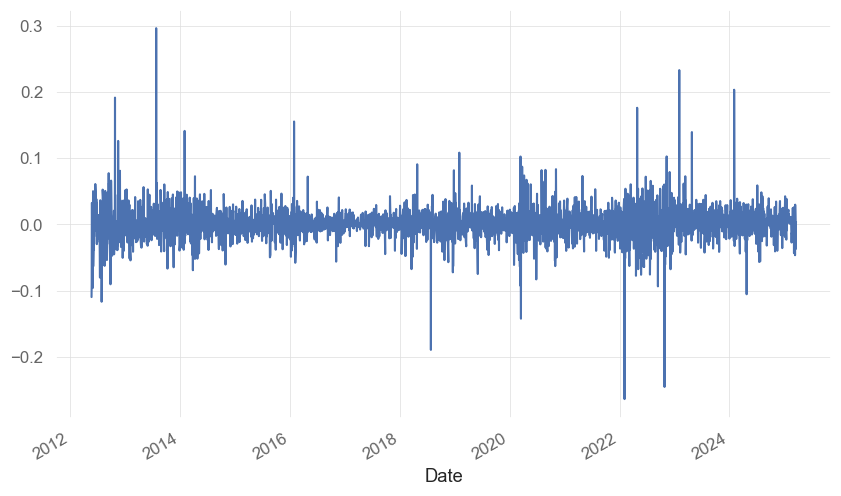

In [17]:
stock.plot();

In [18]:
type(stock)

pandas.core.series.Series

In [19]:
print(dir(stock))

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__column_consortium_standard__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfl

In [20]:
# Estender as funcionalidades da pandas com novas métricas, plots, etc
qs.extend_pandas()

In [21]:
stock.sortino()

1.0922923139871297

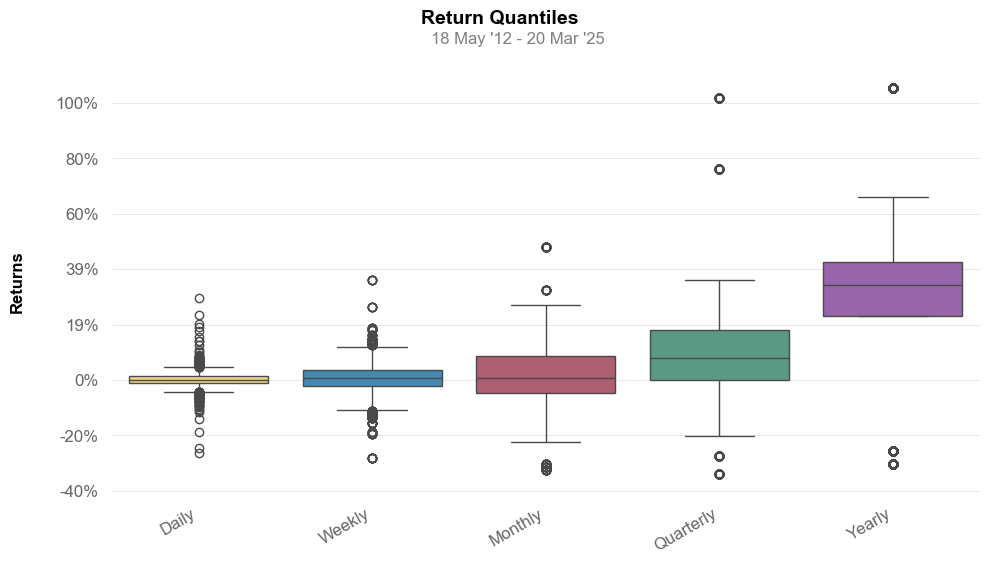

In [22]:
stock.plot_distribution()

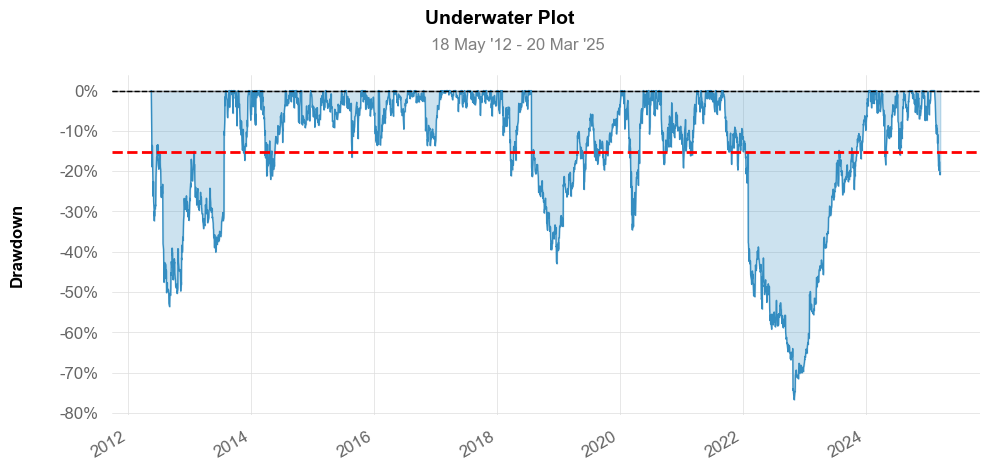

In [23]:
stock.plot_drawdown()

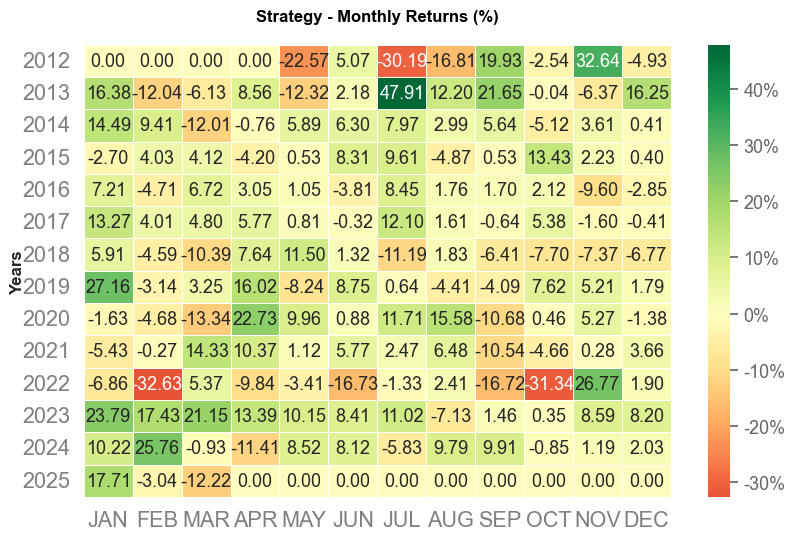

In [24]:
stock.plot_monthly_heatmap()

### **6.2. Papéis Brasileiros**

In [25]:
mglu = qs.utils.download_returns('MGLU3.SA')

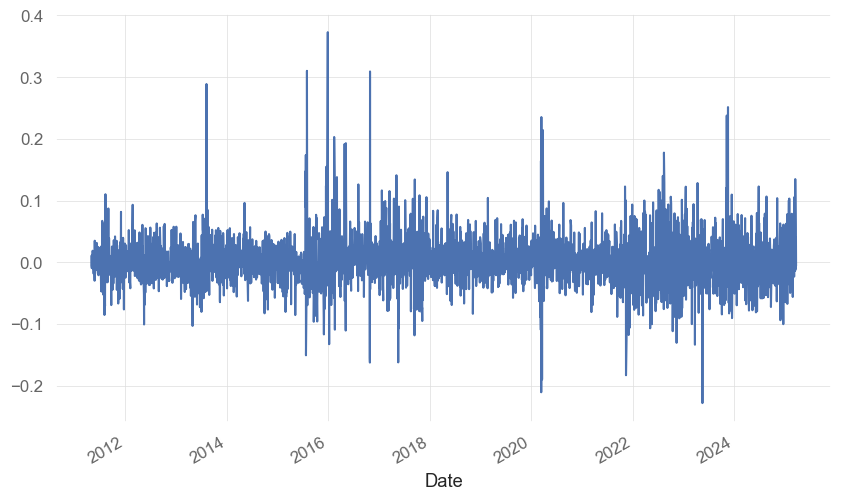

In [26]:
mglu.plot();

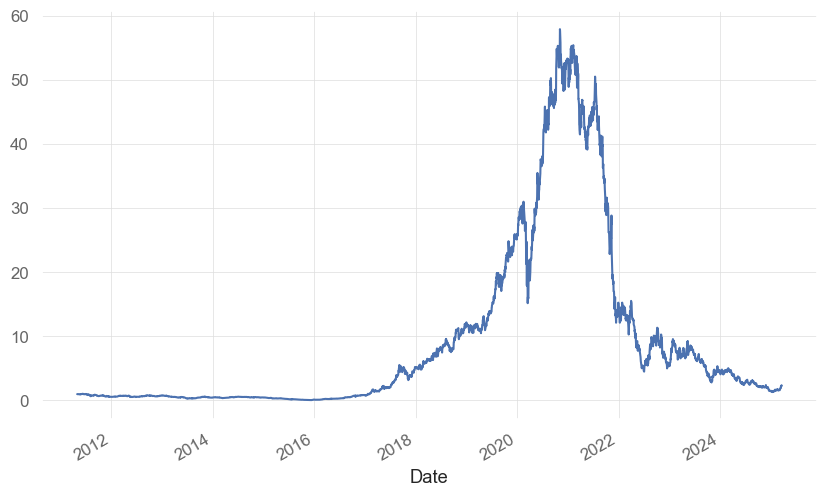

In [27]:
((1 + mglu).cumprod()).plot();

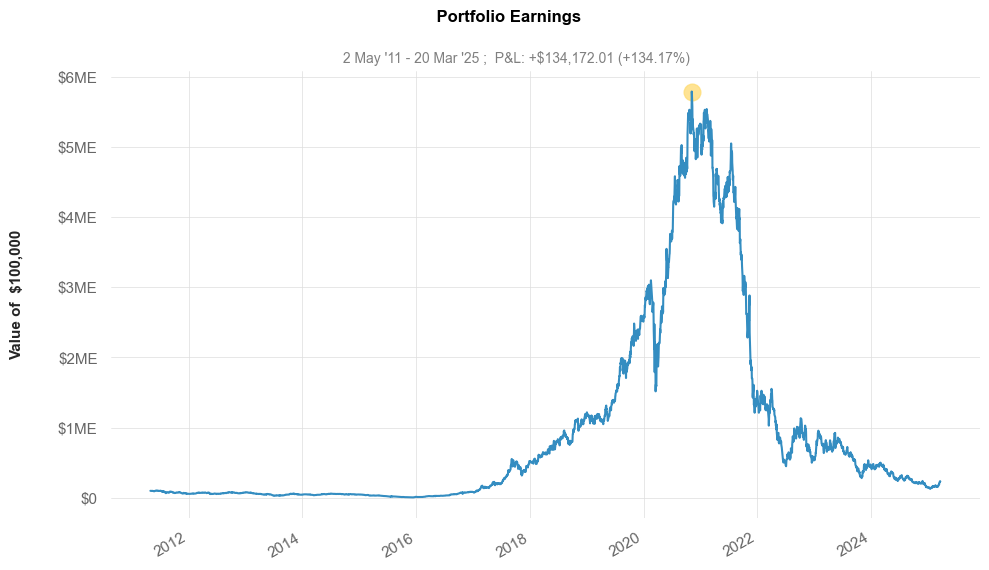

In [28]:
mglu.plot_earnings()

In [29]:
mglu.sortino()

0.6353287586343155

In [30]:
mglu.sharpe()

0.4086598654627553

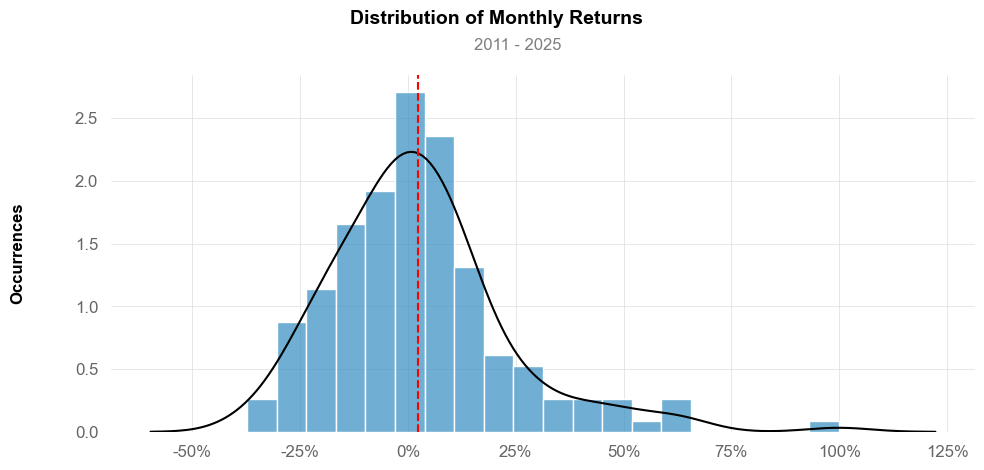

In [31]:
mglu.plot_histogram()

In [32]:
mglu.max_drawdown()

-0.9773306550515425

In [33]:
[f for f in dir(qs.stats) if f[0] != '_']

['adjusted_sortino',
 'autocorr_penalty',
 'avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'distribution',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'omega',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'probabilistic_adjusted_sortino_ratio',
 'probabilistic_ratio',
 'probabilistic_sharpe_ratio',
 'probabilistic_sortino_ratio',
 'profit_factor',
 'profit_ratio',
 'r2',
 'r_squared',
 'rar',
 'recovery_factor',
 'remove_outliers',
 'risk_of_ruin',
 'risk_return_ratio',
 'rolling_greeks',
 'rolling_sharpe',
 'rolling_sortino',
 'rolling_volatility',
 'ror',
 'seren

### **6.3. Criando Relatórios**

#### **6.3.1. Gold ETF 'GLD'**

In [34]:
gold = qs.utils.download_returns('GLD')

In [35]:
qs.reports.metrics(gold)

                    Strategy
------------------  ----------
Start Period        2004-11-19
End Period          2025-03-20
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   532.6%
CAGR﹪              6.46%

Sharpe              0.61
Prob. Sharpe Ratio  99.68%
Sortino             0.86
Sortino/√2          0.61
Omega               1.11

Max Drawdown        -45.56%
Longest DD Days     3263

Gain/Pain Ratio     0.11
Gain/Pain (1M)      0.6

Payoff Ratio        0.98
Profit Factor       1.11
Common Sense Ratio  1.12
CPC Index           0.58
Tail Ratio          1.01
Outlier Win Ratio   3.74
Outlier Loss Ratio  3.87

MTD                 6.64%
3M                  17.17%
6M                  17.39%
YTD                 15.95%
1Y                  40.52%
3Y (ann.)           10.83%
5Y (ann.)           8.35%
10Y (ann.)          6.53%
All-time (ann.)     6.46%

Avg. Drawdown       -3.12%
Avg. Drawdown Days  70
Recovery Factor     4.73
Ulcer Index         0.22
Serenity Index      0.28

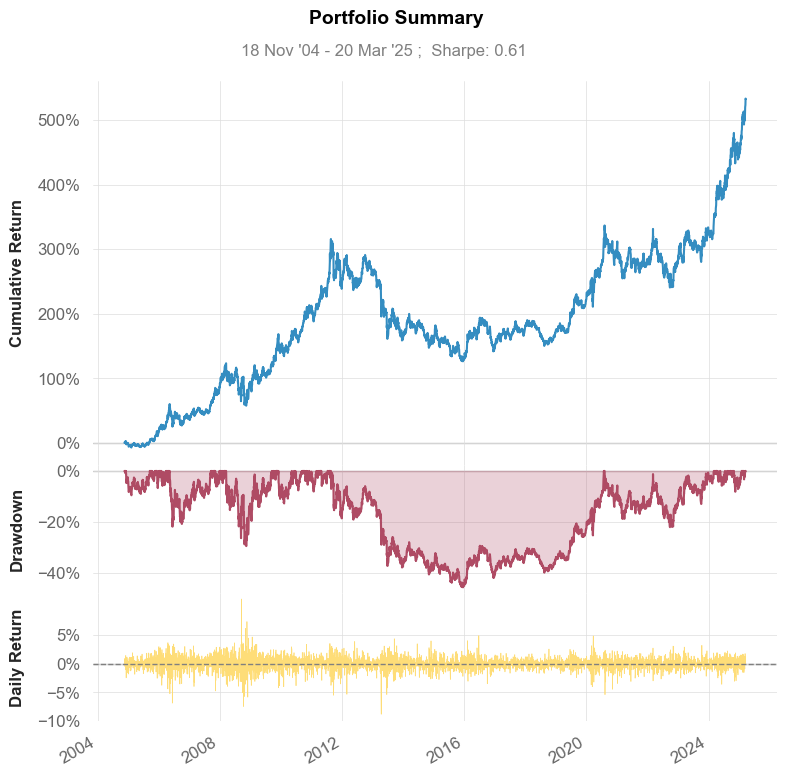

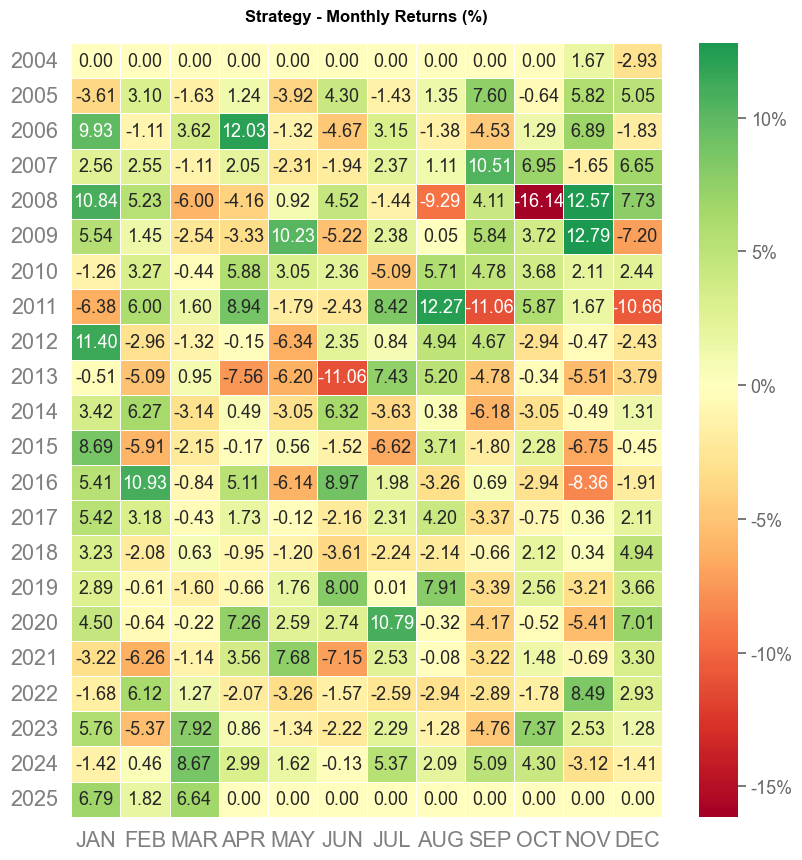

In [36]:
qs.reports.plots(gold)

                    Strategy
------------------  ----------
Start Period        2004-11-19
End Period          2025-03-20
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   532.6%
CAGR﹪              6.46%

Sharpe              0.61
Prob. Sharpe Ratio  99.68%
Sortino             0.86
Sortino/√2          0.61
Omega               1.11

Max Drawdown        -45.56%
Longest DD Days     3263

Gain/Pain Ratio     0.11
Gain/Pain (1M)      0.6

Payoff Ratio        0.98
Profit Factor       1.11
Common Sense Ratio  1.12
CPC Index           0.58
Tail Ratio          1.01
Outlier Win Ratio   3.74
Outlier Loss Ratio  3.87

MTD                 6.64%
3M                  17.17%
6M                  17.39%
YTD                 15.95%
1Y                  40.52%
3Y (ann.)           10.83%
5Y (ann.)           8.35%
10Y (ann.)          6.53%
All-time (ann.)     6.46%

Avg. Drawdown       -3.12%
Avg. Drawdown Days  70
Recovery Factor     4.73
Ulcer Index         0.22
Serenity Index      0.28

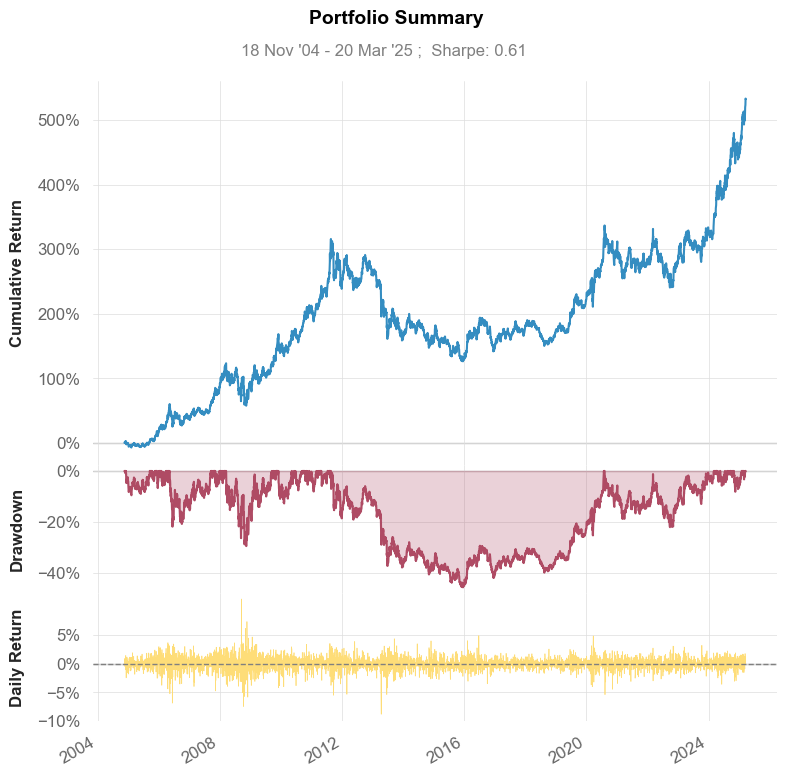

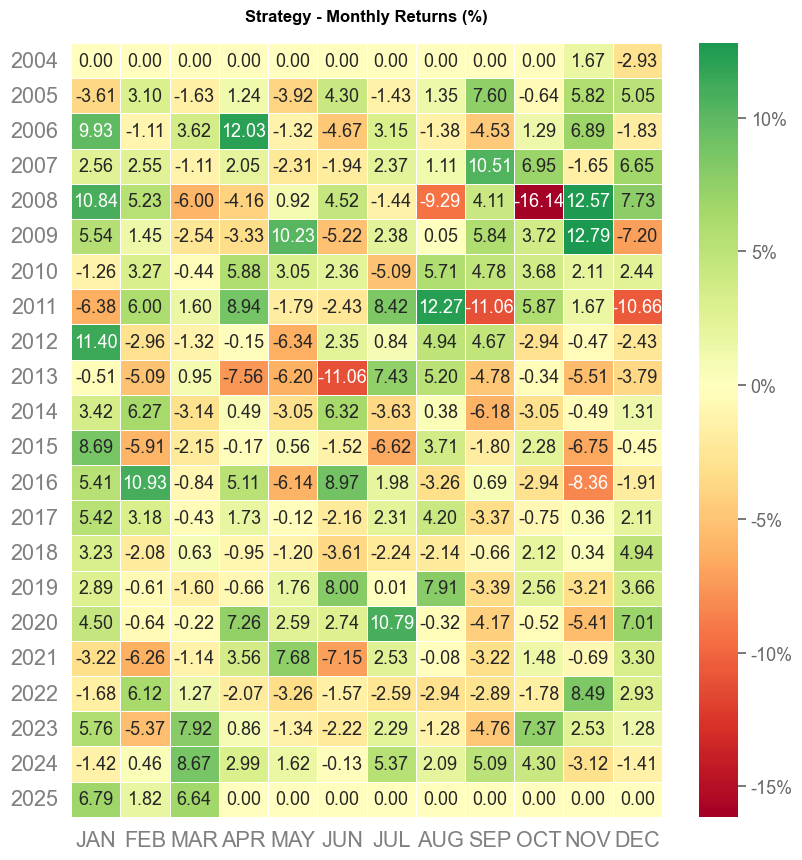

In [37]:
qs.reports.basic(gold)

A partir daqui os códigos estão com erro devido a bug da biblioteca Quantstats

                           Strategy
-------------------------  ----------
Start Period               2004-11-19
End Period                 2025-03-20
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          532.6%
CAGR﹪                     6.46%

Sharpe                     0.61
Prob. Sharpe Ratio         99.68%
Smart Sharpe               0.6
Sortino                    0.86
Smart Sortino              0.85
Sortino/√2                 0.61
Smart Sortino/√2           0.6
Omega                      1.11

Max Drawdown               -45.56%
Longest DD Days            3263
Volatility (ann.)          17.49%
Calmar                     0.14
Skew                       -0.19
Kurtosis                   6.15

Expected Daily %           0.04%
Expected Monthly %         0.76%
Expected Yearly %          8.75%
Kelly Criterion            5.45%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.77%
Expected Shortfall (cVaR)  -1.77%

Max Consecutive Wins       

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2011-08-23,2015-12-17,2020-07-28,3263,-45.555013,-44.287340
2,2008-03-18,2008-11-12,2009-09-15,547,-29.414136,-27.689825
3,2020-08-07,2022-09-26,2024-03-01,1303,-22.002168,-21.006754
4,2006-05-15,2006-06-14,2007-09-17,491,-21.794155,-20.022499
5,2009-12-03,2010-02-08,2010-05-10,159,-12.703473,-12.166471


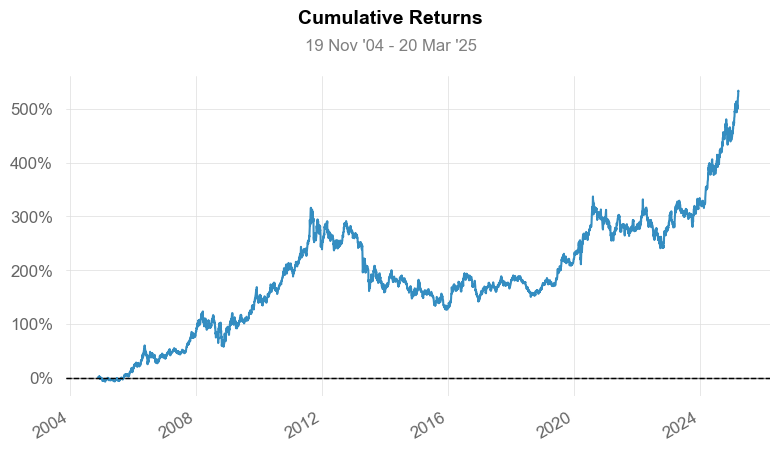

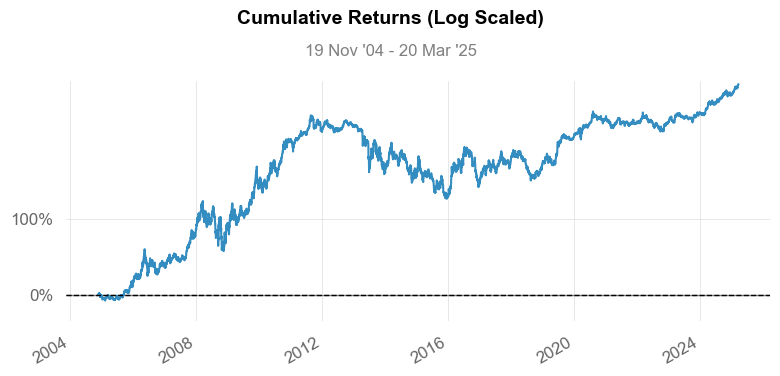

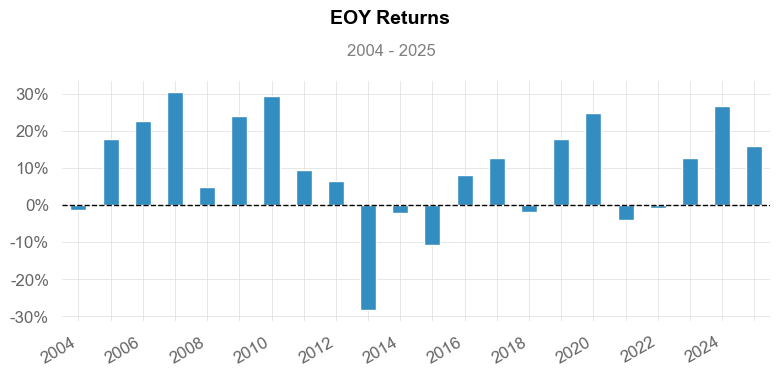

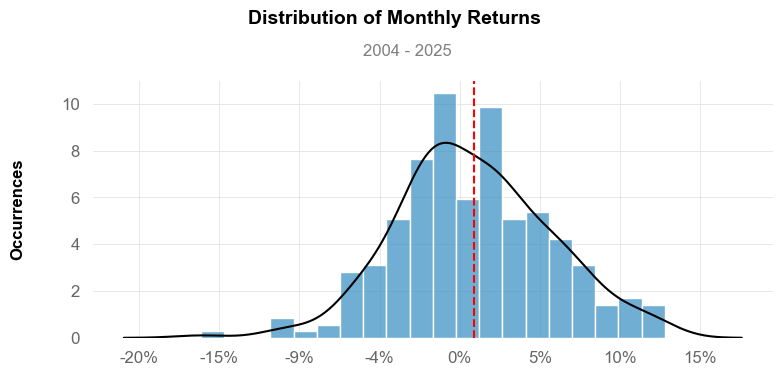

UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [38]:
qs.reports.full(gold)

In [ ]:
qs.reports.html(gold, title = 'ETF de Ouro', output = 'gold.html')

### **6.4. Análise de Portfólio**

In [43]:
acoes = {

    'WEGE3.SA':0.20,
    'MGLU3.SA':0.20,
    'OIBR3.SA':0.20,
    'PETR4.SA':0.20,  # Houve erro usando o 'ITUB4.SA'
    'BPAC11.SA':0.20,


}

In [ ]:
carteira = qs.utils.make_index(acoes)
carteira

In [ ]:
qs.reports.metrics(carteira)

In [ ]:
qs.reports.plots(carteira)

In [ ]:
qs.reports.full(carteira, '^BVSP')

In [ ]:
qs.reports.html(carteira, '^BVSP', title =  'Carteira de Teste', output = 'carteira.html')

## **7. MPL Finance**

### **7.1. Extraindo Dados do Ativo**

In [50]:
ativo = 'AAPL'
dados = yf.download(ativo, start='2022-01-01', multi_level_index=False)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


### **7.2. Gráficos de Candlestick**

#### **7.2.1. Gráfico de Candlestick Simples**

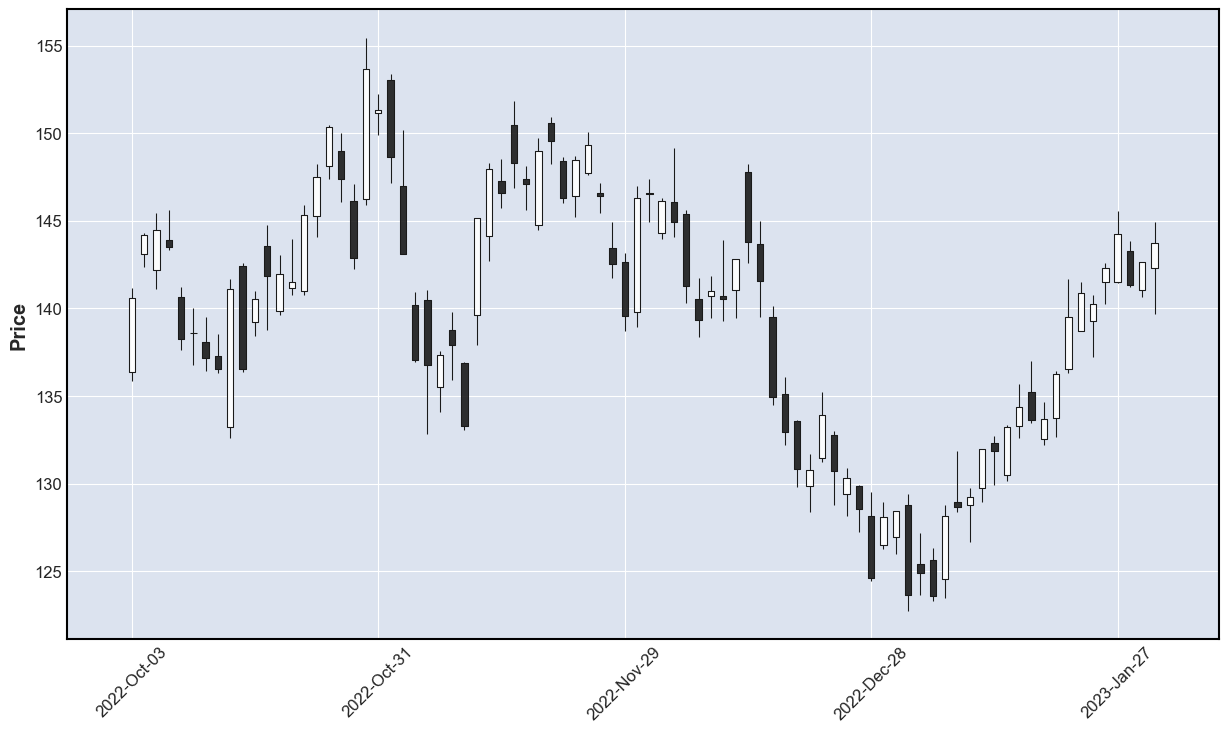

In [57]:
df_plot = dados.loc['2022-10-1':'2023-02-1'].copy()
mpf.plot(df_plot, type='candle', figsize=(16,9))

#### **7.2.2. Adicionando Indicador**

In [58]:
bbol = ta.volatility.BollingerBands(close=dados['Close'], window=20, window_dev=2)
dados['bbol_mean'] = bbol.bollinger_mavg()
dados['bbol_high_band'] = bbol.bollinger_hband()
dados['bbol_low_band'] = bbol.bollinger_lband()

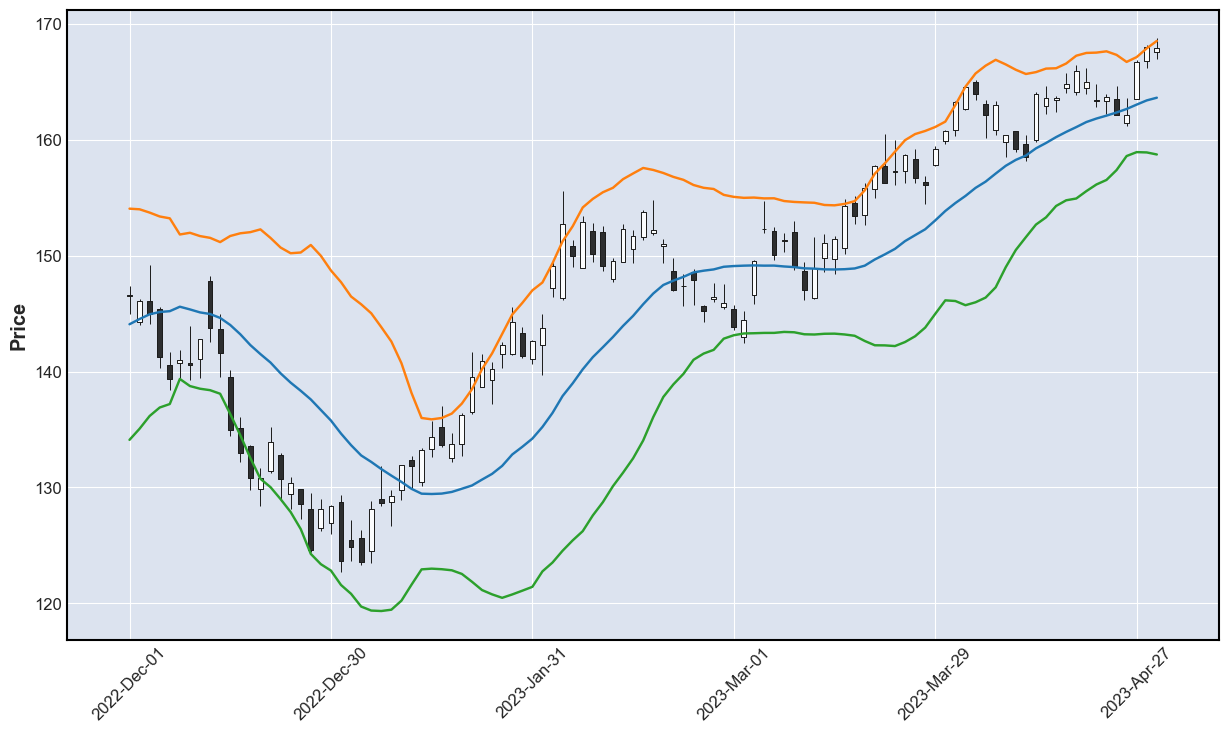

In [53]:
df_plot = dados.loc['2022-12-1':'2023-05-1']
plot_bbol_mean = mpf.make_addplot(df_plot['bbol_mean'])
plot_bbol_high_band = mpf.make_addplot(df_plot['bbol_high_band'])
plot_bbol_low_band = mpf.make_addplot(df_plot['bbol_low_band'])

mpf.plot(df_plot, type='candle', addplot=[plot_bbol_mean, plot_bbol_high_band, plot_bbol_low_band], figsize=(16,9))

#### **7.2.3. Adicionando Painel Inferior**

In [54]:
dados['rsi'] =  ta.momentum.RSIIndicator(close=dados['Close']).rsi()

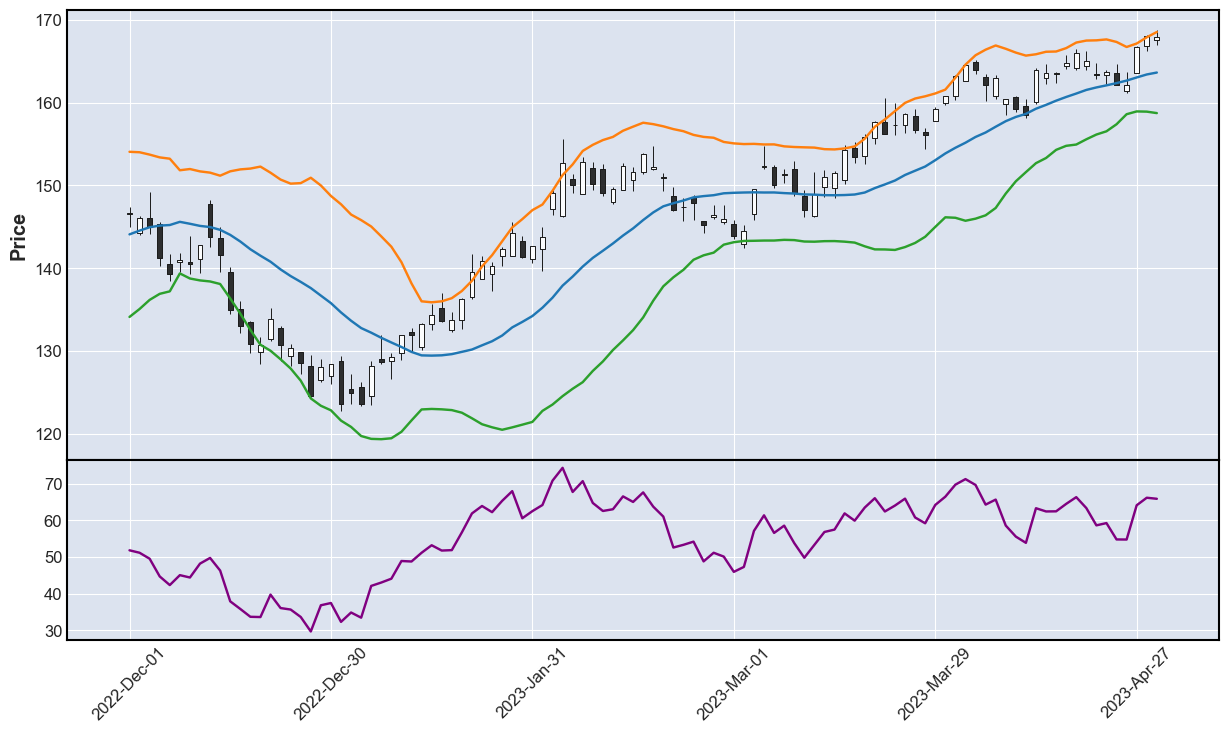

In [55]:
df_plot = dados.loc['2022-12-1':'2023-05-1']
plot_bbol_mean = mpf.make_addplot(df_plot['bbol_mean'])
plot_bbol_high_band = mpf.make_addplot(df_plot['bbol_high_band'])
plot_bbol_low_band = mpf.make_addplot(df_plot['bbol_low_band'])
plot_rsi = mpf.make_addplot(df_plot['rsi'], panel=1, color='purple')

mpf.plot(df_plot, type='candle', addplot=[plot_bbol_mean, plot_bbol_high_band, plot_bbol_low_band, plot_rsi], figsize=(16,9))

#### **7.2.4. Adicionando Volume**

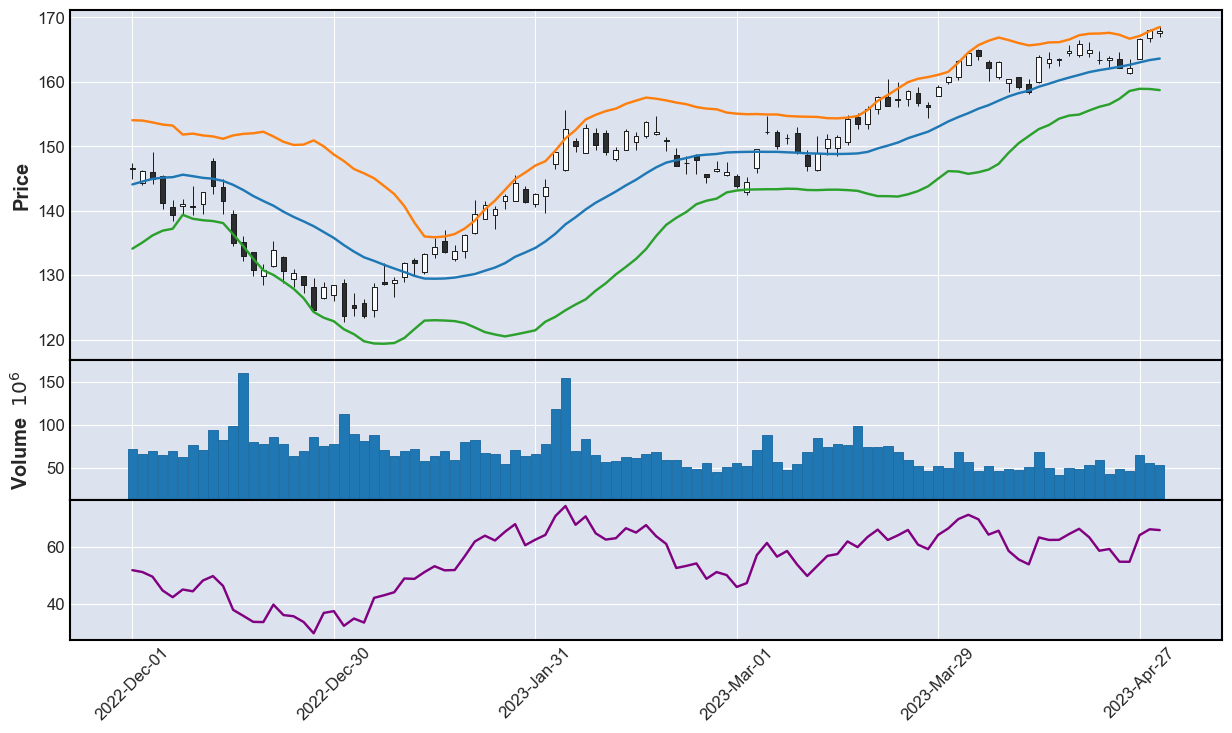

In [56]:
df_plot = dados.loc['2022-12-1':'2023-05-1']
plot_bbol_mean = mpf.make_addplot(df_plot['bbol_mean'])
plot_bbol_high_band = mpf.make_addplot(df_plot['bbol_high_band'])
plot_bbol_low_band = mpf.make_addplot(df_plot['bbol_low_band'])
plot_rsi = mpf.make_addplot(df_plot['rsi'], panel=2, color='purple')

mpf.plot(df_plot, type='candle', addplot=[plot_bbol_mean, plot_bbol_high_band, plot_bbol_low_band, plot_rsi], figsize=(16,9), volume=True)

### **7.3. Estilizando os Gráficos**

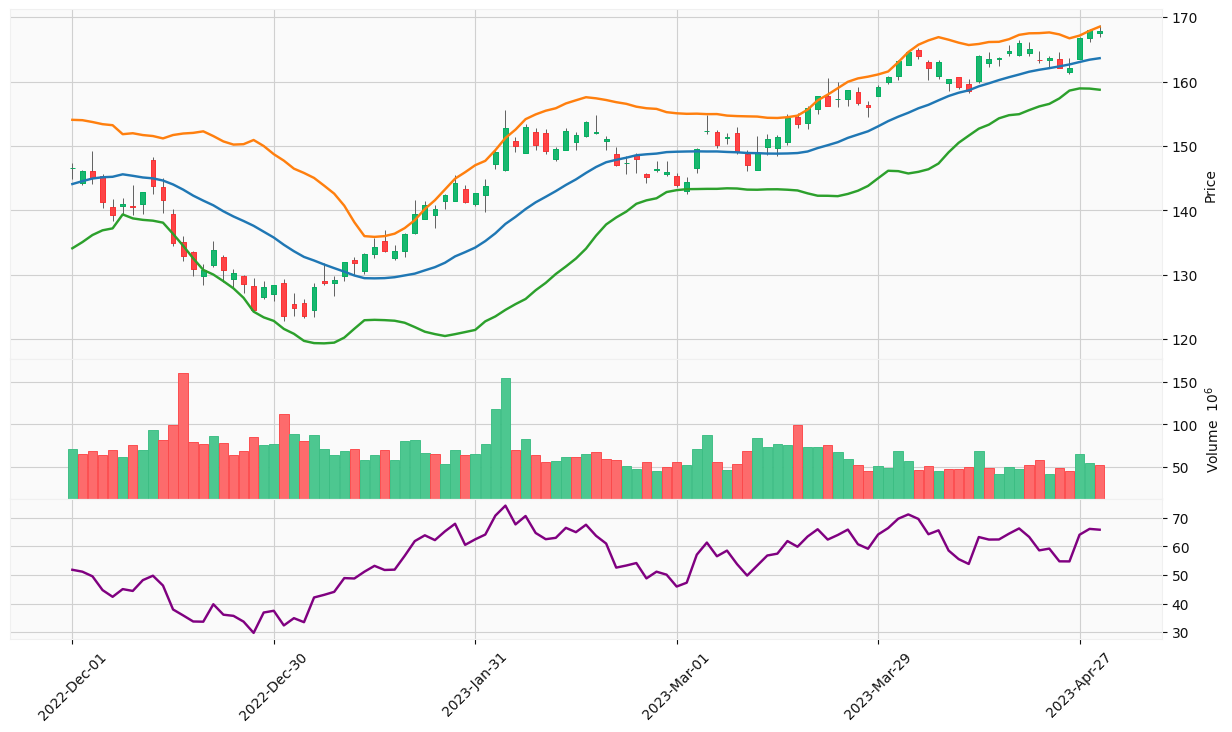

In [59]:
df_plot = dados.loc['2022-12-1':'2023-05-1']
plot_bbol_mean = mpf.make_addplot(df_plot['bbol_mean'])
plot_bbol_high_band = mpf.make_addplot(df_plot['bbol_high_band'])
plot_bbol_low_band = mpf.make_addplot(df_plot['bbol_low_band'])
plot_rsi = mpf.make_addplot(df_plot['rsi'], panel=2, color='purple')

mpf.plot(df_plot, type='candle', style='yahoo', addplot=[plot_bbol_mean, plot_bbol_high_band, plot_bbol_low_band, plot_rsi], figsize=(16,9), volume=True)

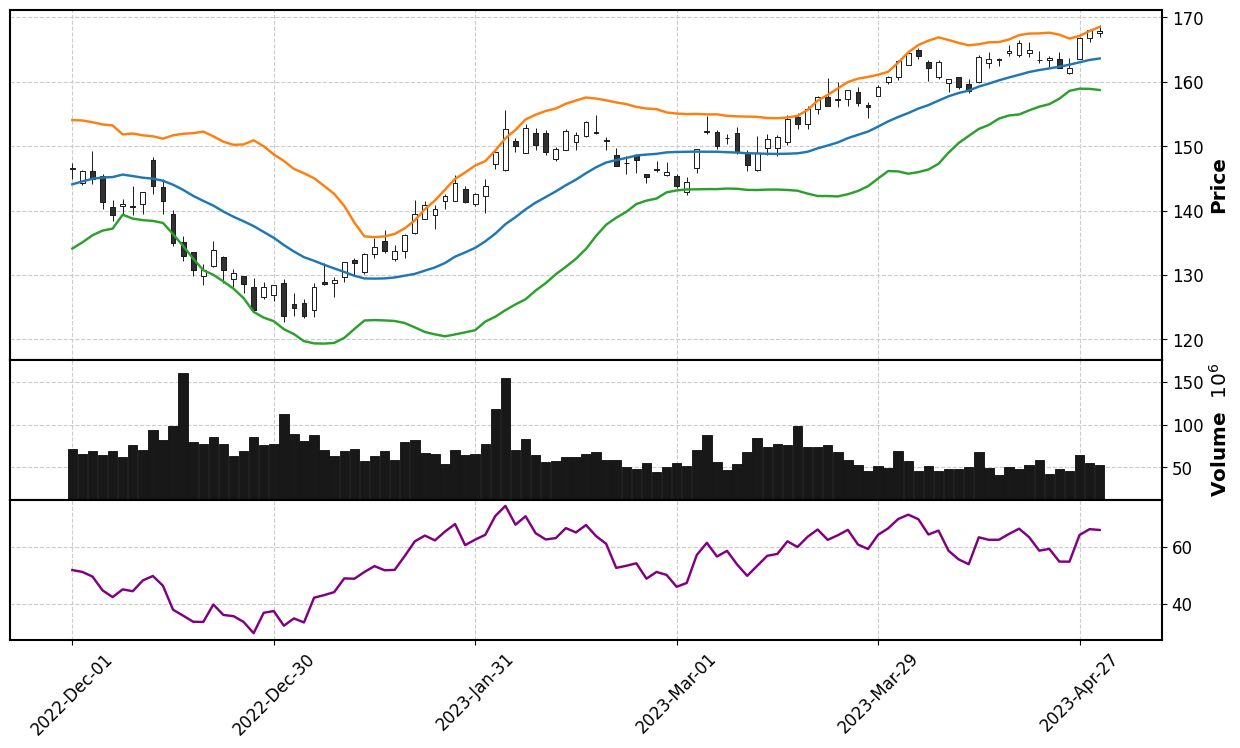

In [60]:
df_plot = dados.loc['2022-12-1':'2023-05-1']
plot_bbol_mean = mpf.make_addplot(df_plot['bbol_mean'])
plot_bbol_high_band = mpf.make_addplot(df_plot['bbol_high_band'])
plot_bbol_low_band = mpf.make_addplot(df_plot['bbol_low_band'])
plot_rsi = mpf.make_addplot(df_plot['rsi'], panel=2, color='purple')

mpf.plot(df_plot, type='candle', style='classic', addplot=[plot_bbol_mean, plot_bbol_high_band, plot_bbol_low_band, plot_rsi], figsize=(16,9), volume=True)

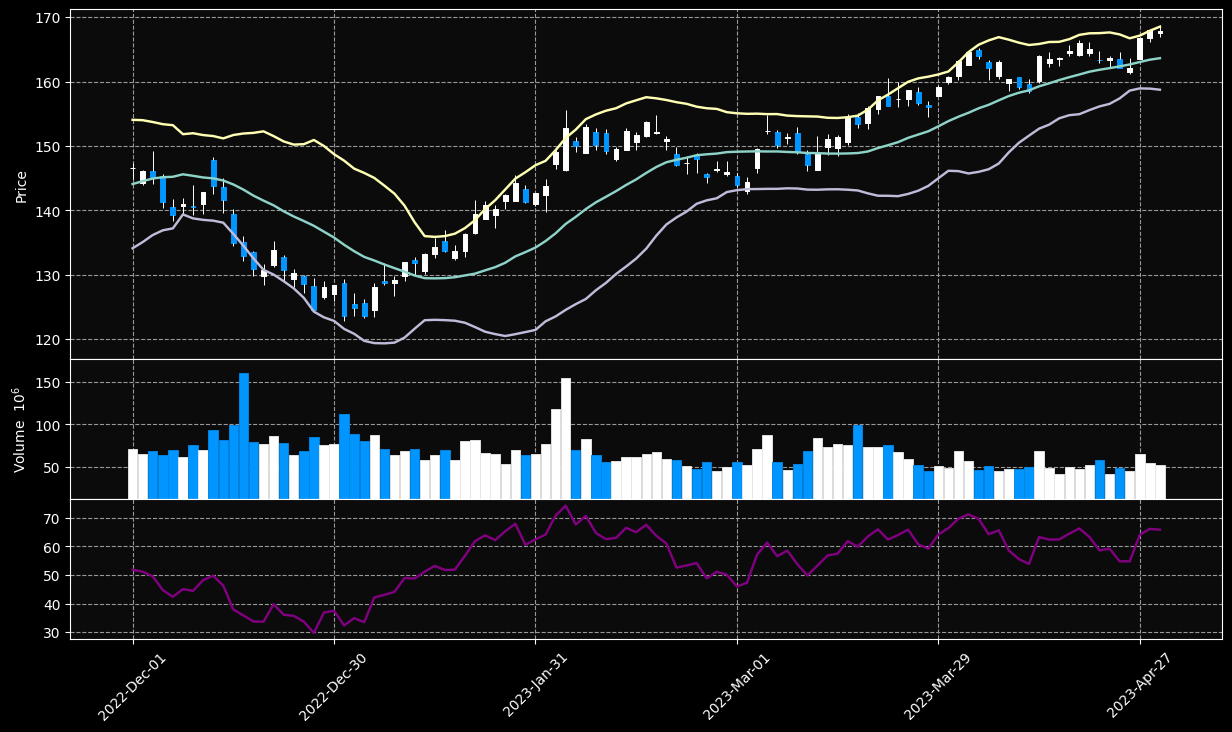

In [61]:
df_plot = dados.loc['2022-12-1':'2023-05-1']
plot_bbol_mean = mpf.make_addplot(df_plot['bbol_mean'])
plot_bbol_high_band = mpf.make_addplot(df_plot['bbol_high_band'])
plot_bbol_low_band = mpf.make_addplot(df_plot['bbol_low_band'])
plot_rsi = mpf.make_addplot(df_plot['rsi'], panel=2, color='purple')

mpf.plot(df_plot, type='candle', style='nightclouds', addplot=[plot_bbol_mean, plot_bbol_high_band, plot_bbol_low_band, plot_rsi], figsize=(16,9), volume=True)

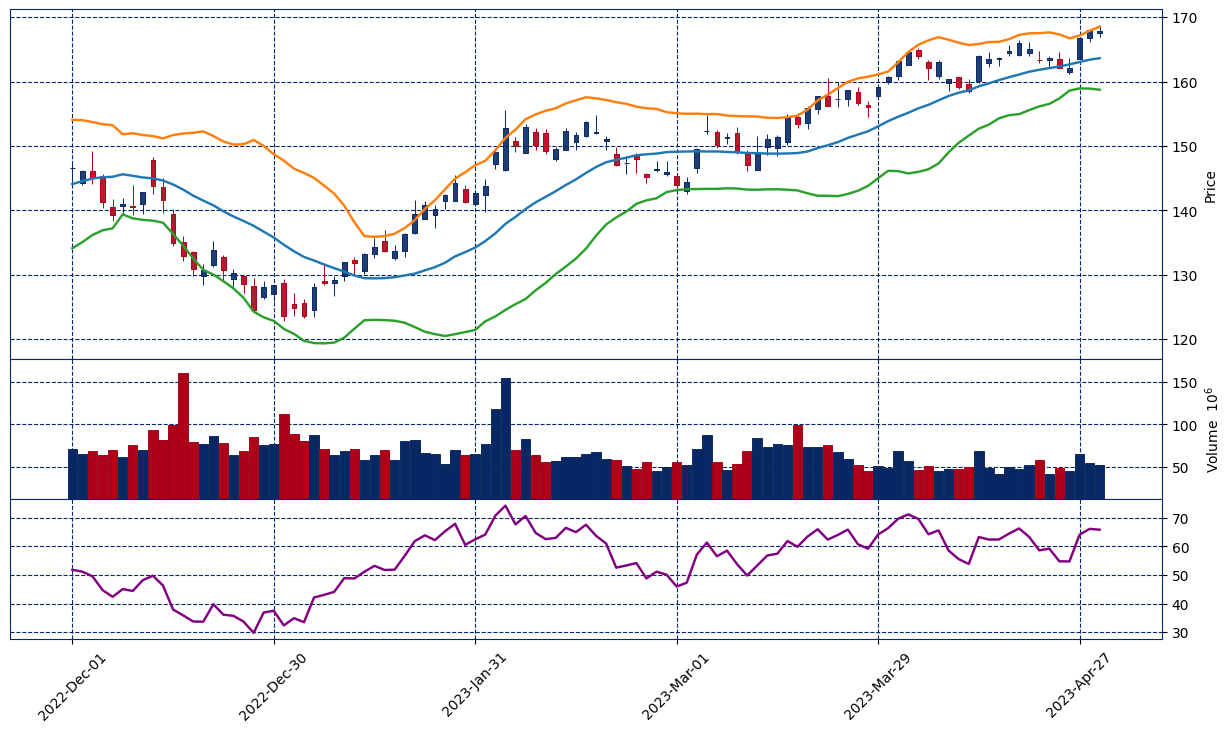

In [62]:
df_plot = dados.loc['2022-12-1':'2023-05-1']
plot_bbol_mean = mpf.make_addplot(df_plot['bbol_mean'])
plot_bbol_high_band = mpf.make_addplot(df_plot['bbol_high_band'])
plot_bbol_low_band = mpf.make_addplot(df_plot['bbol_low_band'])
plot_rsi = mpf.make_addplot(df_plot['rsi'], panel=2, color='purple')

mpf.plot(df_plot, type='candle', style='sas', addplot=[plot_bbol_mean, plot_bbol_high_band, plot_bbol_low_band, plot_rsi], figsize=(16,9), volume=True)